# Тепловая карта

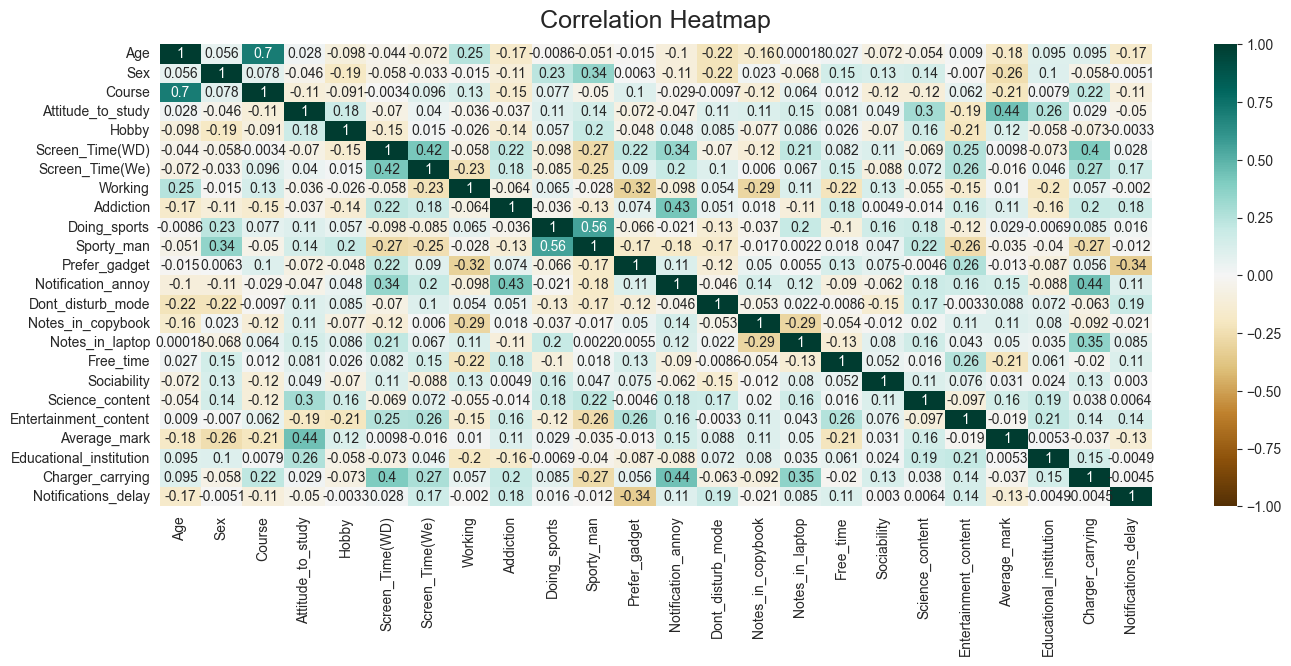

....
 
....


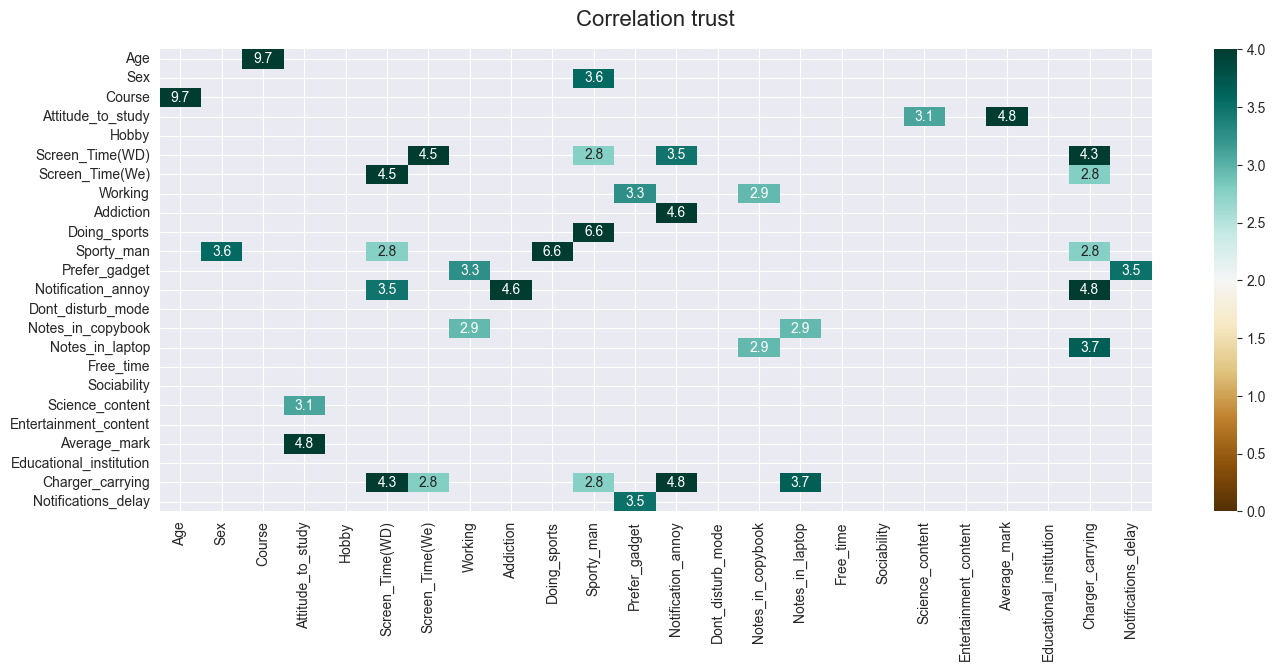

Пирсон Addiction, Notification_annoy : 
 PearsonRResult(statistic=0.4268807377622308, pvalue=1.4430099756297888e-05) 


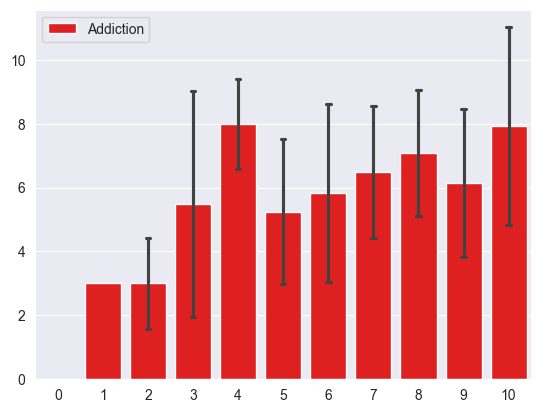

Average_mark, Attitude_to_study 
 PearsonRResult(statistic=0.4448055737466723, pvalue=5.61388861384405e-06) 


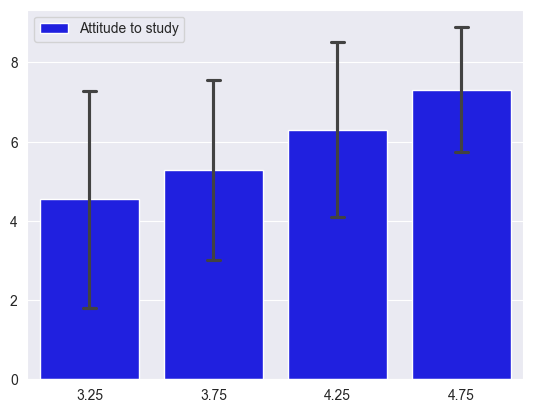

Charger_carrying, Notification_annoy 
 PearsonRResult(statistic=0.4405966258529597, pvalue=7.04100508666582e-06) 


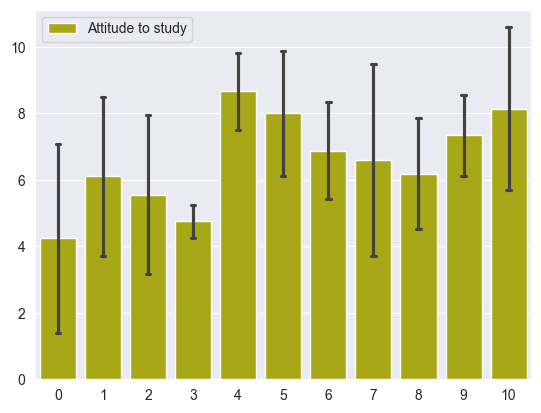

Prefer_gadget, Screen_Time_We 
 PearsonRResult(statistic=0.08960475265281169, pvalue=0.3852896432669245) 


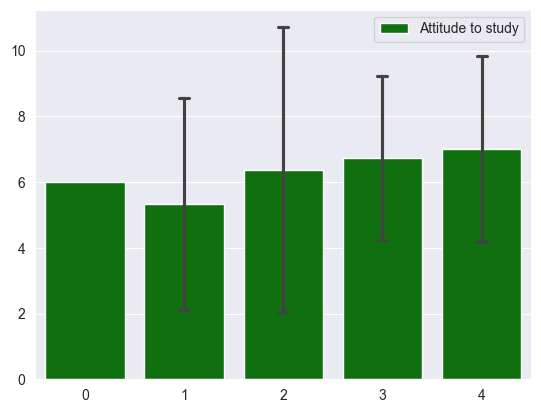

Sporty_man, Sex 
 PearsonRResult(statistic=0.3440333428443549, pvalue=0.0005990106202206335) 


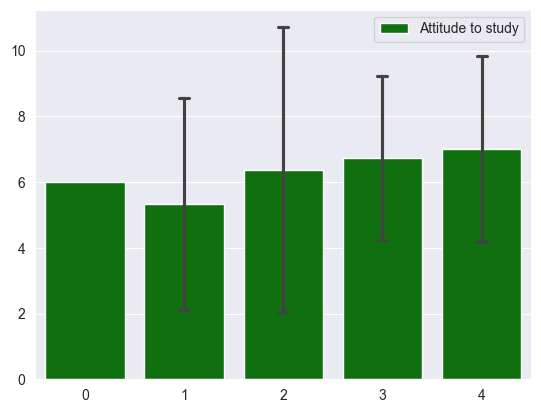

Prefer_gadget, Screen_Time_We 
 PearsonRResult(statistic=0.08960475265281169, pvalue=0.3852896432669245) 


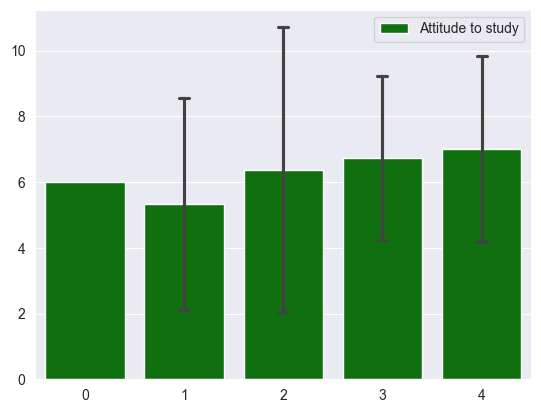

In [2]:
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv

data = pd.read_csv('Answers1.csv')
Age = data['Age'].tolist()
Sex = data['Sex'].tolist()
Course = data['Course'].tolist()
Attitude_to_study = data['Attitude_to_study'].tolist()
Hobby = data['Hobby'].tolist()
Screen_Time_WD = data['Screen_Time(WD)'].tolist()
Screen_Time_We = data['Screen_Time(We)'].tolist()
Working = data['Working'].tolist()
Addiction = data['Addiction'].tolist()
Doing_sports = data['Doing_sports'].tolist()
Sporty_man = data['Sporty_man'].tolist()
Prefer_gadget = data['Prefer_gadget'].tolist()
#Prefer_App_category = data['Prefer_App_category'].tolist()
Notification_annoy = data['Notification_annoy'].tolist()
Dont_disturb_mode = data['Dont_disturb_mode'].tolist()
Notes_in_copybook = data['Notes_in_copybook'].tolist()
Notes_in_laptop = data['Notes_in_laptop'].tolist()
Free_time = data['Free_time'].tolist()
Sociability = data['Sociability'].tolist()
Science_content = data['Science_content'].tolist()
Entertainment_content = data['Entertainment_content'].tolist()
Average_mark = data['Average_mark'].tolist()
Educational_institution = data['Educational_institution'].tolist()
Charger_carrying = data['Charger_carrying'].tolist()
Notifications_delay = data['Notifications_delay'].tolist()

#print(Age, "\n \n", Course, "\n \n", Attitude_to_study, " \n \n", Screen_Time_WD, "\n \n")


df = pd.DataFrame(data)

_= plt.figure(figsize=(16, 6))
mask = np.array(abs(df.corr(method='pearson')) < 0.2)

heatmap = sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12); 

# Сохраните карту как png файл 
# Параметр dpi устанавливает разрешение сохраняемого изображения в точках на дюйм 
# bbox_inches, когда установлен в значение 'tight', не позволяет обрезать лейблы

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()



print("....\n \n....")
_= plt.figure(figsize=(16, 6))
T = abs(df.corr(method='pearson')/(((1-df.corr(method='pearson')**2)/(97-2))**(1/2)))
mask = np.array(T < 2.7)

#print(mask)
heatmap1 = sns.heatmap(T , mask=mask, vmin=0, vmax=4, annot = True, cmap='BrBG')
heatmap1.set_title('Correlation trust', fontdict={'fontsize':16}, pad=17); 
plt.savefig('heatmap1.png', dpi=400, bbox_inches='tight')
plt.show()

test1 = scipy.stats.pearsonr(Addiction, Notification_annoy)
test2 = scipy.stats.pearsonr(Average_mark, Attitude_to_study)
test3 = scipy.stats.pearsonr(Charger_carrying, Notification_annoy)
test4 = scipy.stats.pearsonr(Prefer_gadget, Screen_Time_We)
test5 = scipy.stats.pearsonr(Sporty_man, Sex)
test6 = scipy.stats.pearsonr(Science_content, Attitude_to_study)
test7 = scipy.stats.pearsonr(Charger_carrying, Sporty_man)


print("Пирсон Addiction, Notification_annoy : \n",test1, "\n")

_= sns.barplot(data=data, 
               x=Addiction, 
               y=Notification_annoy, errorbar='sd',color = 'r', 
               capsize=0.1, label="Addiction")
# _ = plt.legend("Notification annoy", "Addiction")
plt.show()
print("Average_mark, Attitude_to_study \n",test2, "\n")



_= sns.barplot(data=data, 
               x=Average_mark, 
               y=Attitude_to_study, errorbar='sd',color = 'b', 
               capsize=0.1, label="Attitude to study")
plt.show()
print("Charger_carrying, Notification_annoy \n",test3, "\n")

_= sns.barplot(data=data, 
               x=Charger_carrying, 
               y=Notification_annoy, errorbar='sd',color = 'y', 
               capsize=0.1, label="Attitude to study")
plt.show()

print("Prefer_gadget, Screen_Time_We \n",test4, "\n")

_= sns.barplot(data=data, 
               x=Prefer_gadget, 
               y=Screen_Time_We, errorbar='sd',color = 'g', 
               capsize=0.1, label="Attitude to study")
plt.show()

print("Sporty_man, Sex \n",test5, "\n")

_= sns.barplot(data=data, 
               x=Prefer_gadget, 
               y=Screen_Time_We, errorbar='sd',color = 'g', 
               capsize=0.1, label="Attitude to study")
plt.show()

print("Prefer_gadget, Screen_Time_We \n",test4, "\n")

_= sns.barplot(data=data, 
               x=Prefer_gadget, 
               y=Screen_Time_We, errorbar='sd',color = 'g', 
               capsize=0.1, label="Attitude to study")
plt.show()

# _= sns.barplot(data=Screen_Time_We, errorbar='sd',color = 'g', 
#                capsize=0.1, label="Screen Time We")
# plt.show()

# shapiro_test = sps.shapiro(Screen_Time_We, Attitude_to_study)
# print("Screen_Time_We, Attitude_to_study \n:", shapiro_test)

# anderson_test = sps.anderson(Screen_Time_We, Attitude_to_study)
# print("Screen_Time_We, Attitude_to_study : \n", anderson_test) 
# 
# dagostino_test = sps.normaltest(Screen_Time_We, Attitude_to_study)
# print("Screen_Time_We, Attitude_to_study :\n",dagostino_test)
# 
# ks_test = sps.kstest(Screen_Time_We, Attitude_to_study)
# print("Screen_Time_We, Attitude_to_study :\n",ks_test)



# Part №2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9170
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.458
Time:                        00:54:09   Log-Likelihood:                -47.627
No. Observations:                  96   AIC:                             105.3
Df Residuals:                      91   BIC:                             118.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9642      0.088     22.250      0.0

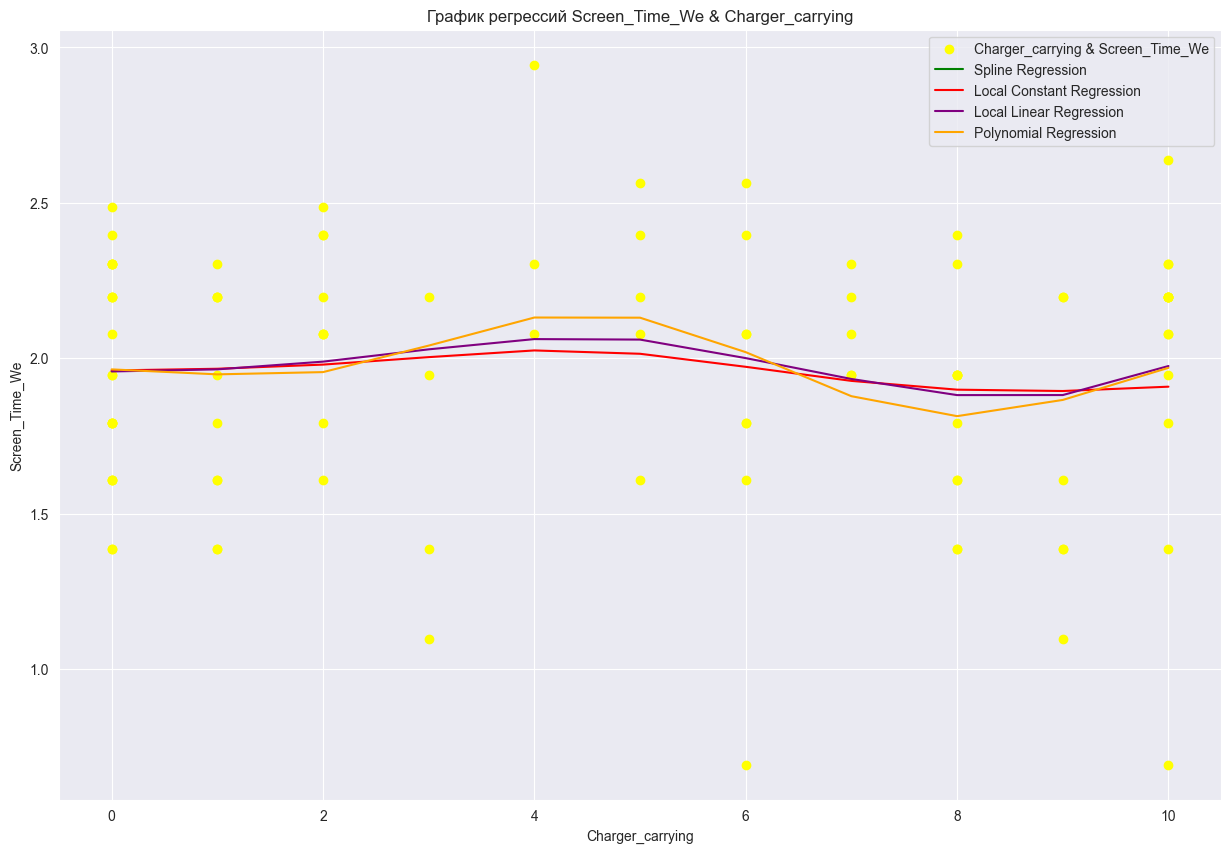

In [25]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
from statsmodels.nonparametric.kernel_regression import KernelReg
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import f
from statsmodels.stats.outliers_influence import summary_table


# Локально постоянная и линейная регрессия
def local_constant_regression(X, Y, kernel):
    model = KernelReg(Y, X, var_type='u', reg_type='lc', bw='cv_ml', ukertype=kernel)
    return model

def local_linear_regression(X, Y, kernel):
    model = KernelReg(Y, X, var_type='u', reg_type='ll', bw='cv_ml', ukertype=kernel)
    return model

# Регрессия сплайнами
def spline_regression(X, Y):
    
    xs = sorted(zip(X, Y), key=lambda tup: tup[0])
    x_sorted = [x[0] for x in xs]
    y_sorted = [x[1] for x in xs]    
    tck = splrep(x_sorted, y_sorted, s=0)
    y_smooth = splev(x_sorted, tck, der=0)
    return x_sorted, y_smooth

np.array(Charger_carrying)
X0 = np.ones(len(Screen_Time_We))
X = np.array(Charger_carrying)

xs = sorted(zip(X, Screen_Time_We), key=lambda tup: tup[0])
X = [x[0] for x in xs]
Screen_Time_We = [x[1] for x in xs] 

X = np.array(X)
Y = np.log(np.array(Screen_Time_We) + 1)
X_poly = sm.add_constant(np.column_stack((X0, X, X**2, np.log(X+1), np.sin(X))))

#Линейная регрессия
model1 = sm.OLS(Y, X_poly).fit()

#Сплайн
x_spline, y_spline = spline_regression(X, Y)

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken', "gaussian"]
for kernel in kernels:
    results_lc = local_constant_regression(X, Y, kernel)
    results_ll = local_linear_regression(X, Y, kernel)


b = model1.params
Y_plt = b[0] + b[1] * X + b[2]* X**2 + b[3]* np.log(X+1) + b[4] * np.sin(X)
print(model1.summary())
 

plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='yellow', label='Charger_carrying & Screen_Time_We')
plt.plot(x_spline, y_spline, color='green', label='Spline Regression')
plt.plot(X, results_lc.fit(X)[0], color='red', label='Local Constant Regression')
plt.plot(X, results_ll.fit(X)[0], color='purple', label='Local Linear Regression')
plt.plot(X, Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий Screen_Time_We & Charger_carrying')
plt.ylabel('Screen_Time_We')
plt.xlabel('Charger_carrying')
plt.legend()
plt.show()


# model2 = sm.OLS(Screen_Time_WD, Charger_carrying).fit()
# model3 = sm.OLS(Screen_Time_We, Age).fit()
# model4 = sm.OLS(Screen_Time_WD, Age).fit()
# model5 = sm.OLS()